In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from prettytable import PrettyTable

# Analisis Inicial de los Datos

In [3]:
#Leer los datos "Datos Proyecto Final": Utiliza pandas para cargar los datos de la encuesta desde un archivo CSV.
df = pd.read_csv('Datos_pr.csv', encoding='latin-1')

In [3]:
#Obtener las preguntas de la encuesta: Extrae y muestra las preguntas incluidas en tu conjunto de datos.
df.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [5]:
#Traduce el nombre de las preguntas: Cambia las columnas del dataframe para que se encuentren en español
df.columns = ['Respuesta Id',
'Haces nuevos amigos con regularidad',
'Dedicas gran parte de tu tiempo libre a explorar diversos temas aleatorios que despiertan tu interes',
'Ver a otras personas llorar puede hacer que tu tambien sientas ganas de llorar',
'A menudo haces un plan de respaldo para tu plan de respaldo',
'Por lo general, te mantienes tranquilo, incluso bajo mucha presion',
'En los eventos sociales, rara vez intentas presentarte a nuevas personas y hablas principalmente con quienes ya conoces',
'Prefieres terminar completamente un proyecto antes de comenzar otro',
'Eres muy sentimental',
'Te gusta usar herramientas de organizacion como horarios y listas',
'Incluso un pequeno error puede hacerte dudar de tus habilidades y conocimientos en general',
'Te sientes comodo acercandote a alguien que encuentras interesante e iniciando una conversacion',
'No te interesa demasiado discutir diversas interpretaciones y analisis de obras creativas',
'Tienes mas inclinacion a seguir tu razon que tu corazon',
'Por lo general, prefieres hacer lo que sientes en un momento dado en lugar de planificar una rutina diaria especifica',
'Rara vez te preocupas por la impresion que causas en las personas que conoces',
'Disfrutas participar en actividades grupales',
'Te gustan los libros y peliculas que te hacen crear tu propia interpretacion del final',
'Tu felicidad proviene mas de ayudar a otros a lograr cosas que de tus propios logros',
'Estas interesado en tantas cosas que te resulta dificil elegir que probar a continuacion',
'Eres propenso a preocuparte de que las cosas empeoren',
'Evitas los roles de liderazgo en entornos grupales',
'Definitivamente no eres una persona artistica',
'Crees que el mundo seria un lugar mejor si la gente confiara mas en la racionalidad y menos en sus sentimientos',
'Prefieres hacer tus tareas antes de permitirte relajarte',
'Disfrutas ver a la gente discutir',
'Tienes tendencia a evitar llamar la atencion sobre ti mismo',
'Tu estado de animo puede cambiar muy rapido',
'Pierdes la paciencia con las personas que no son tan eficientes como tu',
'A menudo terminas haciendo las cosas en el ultimo momento posible',
'Siempre te ha fascinado la pregunta de que sucede despues de la muerte, si es que sucede algo',
'Por lo general, prefieres estar rodeado de otras personas en lugar de estar solo',
'Te aburres o pierdes interes cuando la discusion se vuelve demasiado teorica',
'Te resulta facil empatizar con una persona cuyas experiencias son muy diferentes a las tuyas',
'Por lo general, pospones la toma de decisiones finales el mayor tiempo posible',
'Rara vez dudas de las decisiones que has tomado',
'Despues de una semana larga y agotadora, un evento social animado es justo lo que necesitas',
'Disfrutas ir a museos de arte',
'A menudo te cuesta entender los sentimientos de otras personas',
'Te gusta tener una lista de tareas diarias',
'Rara vez te sientes inseguro',
'Evitas hacer llamadas telefonicas',
'A menudo pasas mucho tiempo tratando de entender puntos de vista muy diferentes al tuyo',
'En tu circulo social, a menudo eres quien contacta a los amigos e inicia actividades',
'Si tus planes se ven interrumpidos, tu maxima prioridad es volver a encarrilarte lo antes posible',
'Todavia te molestan errores que cometiste hace mucho tiempo',
'Rara vez contemplas las razones de la existencia humana o el significado de la vida',
'Tus emociones te controlan mas de lo que tu las controlas',
'Te esfuerzas mucho en no hacer quedar mal a las personas, incluso cuando es completamente su culpa',
'Tu estilo de trabajo personal se parece mas a rafagas espontaneas de energia que a esfuerzos organizados y consistentes',
'Cuando alguien piensa muy bien de ti, te preguntas cuanto tiempo tomara antes de que se sienta decepcionado',
'Te encantaria un trabajo que requiera trabajar solo la mayor parte del tiempo',
'Crees que reflexionar sobre cuestiones filosoficas abstractas es una perdida de tiempo',
'Te sientes mas atraido por lugares con atmosferas bulliciosas y llenas de actividad que por lugares tranquilos e intimos',
'Sabes a primera vista como se siente alguien',
'A menudo te sientes abrumado',
'Completas las cosas metodicamente sin omitir ningun paso',
'Te intrigan mucho las cosas etiquetadas como controversiales',
'Dejarias pasar una buena oportunidad si crees que otra persona la necesita mas',
'Te cuesta cumplir con los plazos',
'Te sientes seguro de que las cosas saldran bien para ti',
'Personalidad',
]

In [ ]:
#Guarda el dataframe con las preguntas traducidas en un archivo: datos_trad.csv
df.to_csv('datos_trad.csv', index=False, index_label=False)

In [5]:
#Encontrar el número de registros: Determina y muestra el número total de registros en el dataset.
df.shape

(59999, 62)

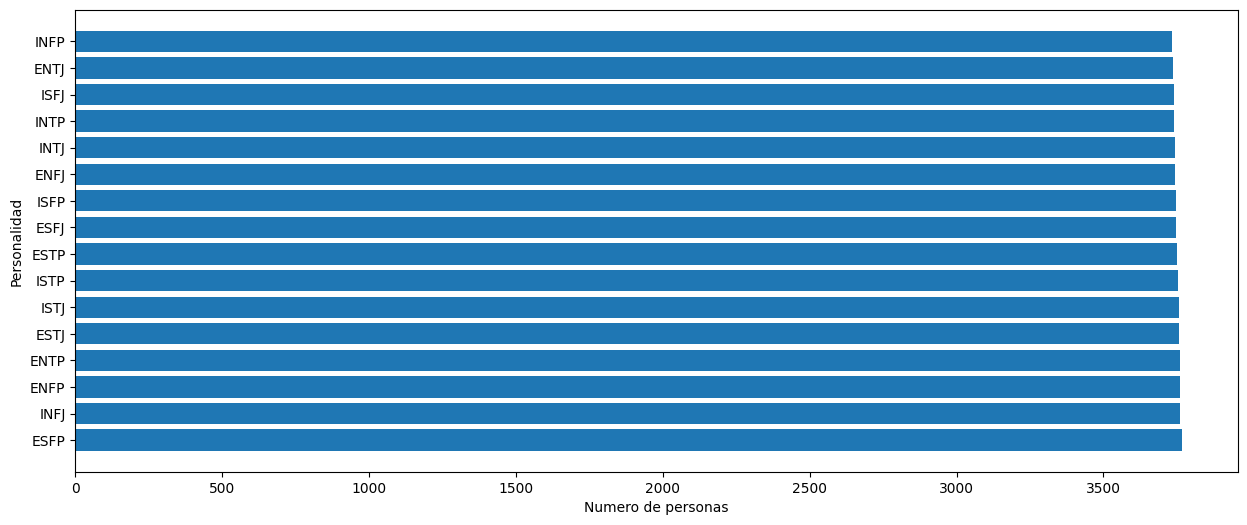

In [6]:
#Encontrar el número de personas para cada tipo de personalidad: Agrupa los datos por tipo de personalidad y muestra en una gráfica cuántas personas hay en cada grupo.
cant_person = df['Personalidad'].value_counts()
plt.figure(figsize=(15,6))
plt.barh(cant_person.index, cant_person.values)
plt.xlabel('Numero de personas')
plt.ylabel('Personalidad')
plt.show()

In [7]:
#Indicar cada grupo de personalidad definido: Enumera y describe brevemente cada grupo de personalidad encontrado en los datos.
df['Personalidad'].unique()

array(['ENFP', 'ISFP', 'INFJ', 'ISTP', 'ENFJ', 'INTJ', 'ENTJ', 'ESFP',
       'INFP', 'INTP', 'ISTJ', 'ENTP', 'ISFJ', 'ESTJ', 'ESTP', 'ESFJ'],
      dtype=object)

1. ENFP (El Inspirador): Creativos, entusiastas y sociables. Les encanta explorar nuevas ideas y conectar con las personas.

2. ISFP (El Artista): Tranquilos, espontáneos y sensibles. Expresan su creatividad de manera artística y valoran la libertad.

3. INFJ (El Consejero): Idealistas, profundos y estratégicos. Se preocupan por los demás y buscan hacer un impacto positivo en el mundo.

4. ISTP (El Virtuoso): Prácticos, independientes y lógicos. Disfrutan explorando cómo funcionan las cosas a través de la experiencia.

5. ENFJ (El Líder Carismático): Sociables, empáticos y organizados. Son buenos motivando e inspirando a los demás.

6. INTJ (El Estratega): Analíticos, independientes y visionarios. Les gusta la eficiencia y la planificación a largo plazo.

7. ENTJ (El Comandante): Líderes natos, decididos y orientados a la acción. Buscan la eficiencia y la toma de decisiones estratégicas.

8. ESFP (El Animador): Alegres, espontáneos y extrovertidos. Aman la diversión y disfrutan vivir el momento.

9. INFP (El Idealista): Creativos, soñadores y sensibles. Buscan significado en todo y son guiados por sus valores.

10. INTP (El Filósofo): Lógicos, curiosos y analíticos. Les gusta explorar teorías e ideas abstractas.

11. ISTJ (El Inspector): Responsables, organizados y meticulosos. Siguen reglas y valoran la estabilidad.

12. ENTP (El Innovador): Ingeniosos, argumentativos y espontáneos. Disfrutan los desafíos intelectuales y la exploración de nuevas ideas.

13. ISFJ (El Defensor): Amables, leales y protectores. Se preocupan profundamente por los demás y buscan armonía.

14. ESTJ (El Ejecutivo): Organizados, prácticos y líderes naturales. Se enfocan en resultados y toman decisiones con firmeza.

15. ESTP (El Aventurero): Energéticos, valientes y sociables. Les gusta la acción y el riesgo.

16. ESFJ (El Cuidador): Amables, extrovertidos y serviciales. Disfrutan cuidar de los demás y crear ambientes armoniosos.


# Modelo Supervisado

Implementación de un modelo supervisado en base a árboles aleatorios/random forest

In [7]:
#Conversión de Datos

#Convertir la columna respuesta a etiquetas numéricas: Utiliza pd.factorize() para convertir las respuestas categóricas en etiquetas numéricas.
df['Personalidad'], _ = pd.factorize(df['Personalidad'])
df['Personalidad'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [8]:
#Dividir en conjuntos de entrenamiento y prueba: 
X = df.drop(['Personalidad'], axis=1)
y = df['Personalidad']

#Utiliza train_test_split de sklearn para separar los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Diseñar un modelo de árbol de clasificación simple: Implementa un árbol de clasificación usando DecisionTreeClassifier de sklearn

#Optimizar la precisión del modelo: Prueba con 4-5 profundidades diferentes 
depths = [10, 15, 20, 35, 40]
train_results_simple = []
validation_results_simple = []

for dp in depths:
    #definir el calsificar de arbol de decision
    clf = DecisionTreeClassifier(max_depth=dp)
    
    #ajustar el modelo en los datos de entrenamiento
    clf.fit(X_train, y_train)
    
    #usar el modelo entrenado para predecir los datos de entrenamiento
    train_predic = clf.predict(X_train)
    
    #usar el modelo entrenado para predecir los datos de validacion
    validation_predic = clf.predict(X_test)
    
    #calcular la precision de los datos de entrenamiento y guardarla en la lista
    train_results_simple.append(accuracy_score(y_train, train_predic))
    
    #calcular la precision de los datos de validacion y guardarla en la lista
    validation_results_simple.append(accuracy_score(y_test, validation_predic))

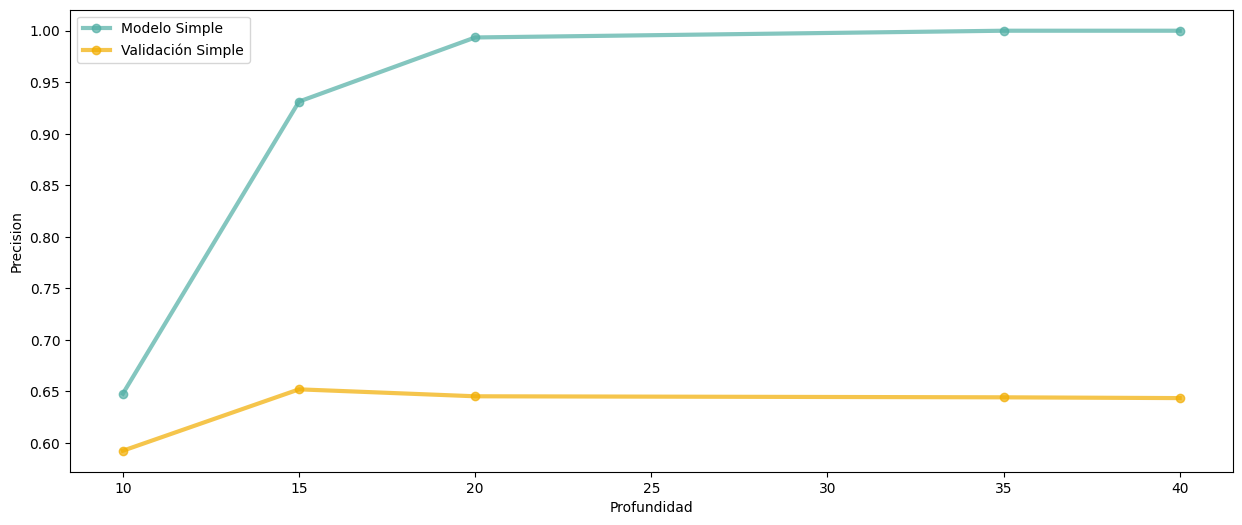

In [10]:
#grafica la precisión de cada configuración de profundidad
plt.figure(figsize=(15,6))
plt.plot(depths, train_results_simple, "o-", alpha=0.7, linewidth=3, color='#50AEA4', label='Modelo Simple')
plt.plot(depths, validation_results_simple, "o-", alpha=0.7, linewidth=3, color='#F2AD00', label='Validación Simple')
plt.ylabel('Precision')
plt.xlabel('Profundidad')
plt.legend(loc='best')
plt.show()

In [11]:
#Predicciones y observaciones: Con el modelo optimizado, realiza una predicción de los datos y anota tus observaciones.
table = PrettyTable()
table.field_names = ['Profundidad', 'Precisión (%)']
for pd, acc in zip(depths, validation_results_simple):
    table.add_row([pd, round(acc*100, 2)])

print(table)

+-------------+---------------+
| Profundidad | Precisión (%) |
+-------------+---------------+
|      10     |     59.23     |
|      15     |     65.19     |
|      20     |     64.52     |
|      35     |     64.42     |
|      40     |     64.34     |
+-------------+---------------+


Las observaciones son las siguientes. 

Con el modelo optimizado se observa que con una profundidad maxima de 15 para el arbol de decision alcanzamos una precision del 65.33% en la prediccion 

# Modelo Bagging de Clasificación

In [12]:
# Obtener un modelo de bagging de clasificación: Utiliza BaggingClassifier con un DecisionTreeClassifier. Optimiza la profundidad del árbol

#predicciones con bagging
def bagging_predictions(X_train, y_train, X_test, max_depth, num_estimators=20):
    # Lista para almacenar las predicciones de cada árbol
    predictions = []
    
    for _ in range(num_estimators):
        #realizar el primer muestreo con los indices
        resample_indices = np.random.choice(len(y_train), size=len(y_train), replace=True)
        
        #crear un conjunto de datos de arranque bootstrap con los indices anteriores
        X_boot = X_train.iloc[resample_indices]
        y_boot = y_train.iloc[resample_indices]
        
        # Calcular las predicciones de un árbol de decisión
        clf2 = DecisionTreeClassifier(max_depth=max_depth, random_state=2024)
        
        #ajustar el modelo en el conjunto de entrenamiento de bootstrap
        clf2.fit(X_boot, y_boot)
        
        #agregar las predicciones a la lista de predicciones
        predictions.append(clf2.predict(X_test))
    
    # Convertir la lista de predicciones en un array y tomar la moda (mayoría de votos)
    predictions = np.array(predictions)
    
    # Obtener la moda a lo largo de las filas (votación mayoritaria)
    final_prediction = mode(predictions, axis=0, keepdims=True)[0][0]  # Extraemos la moda correctamente
    
    return final_prediction

In [83]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
# Evaluar la precision del modelo de bagging
train_results_bagging = []

for depth in depths:
    # Llamar a la función de predicción de embolsado con los parámetros apropiados
    y_pred_bagging = bagging_predictions(X_train, y_train, X_test, max_depth=depth, num_estimators=20)
    
    # Calcular la precisión de las predicciones de embolsado
    acc = accuracy_score(y_test, y_pred_bagging)
    
    train_results_bagging.append(acc)

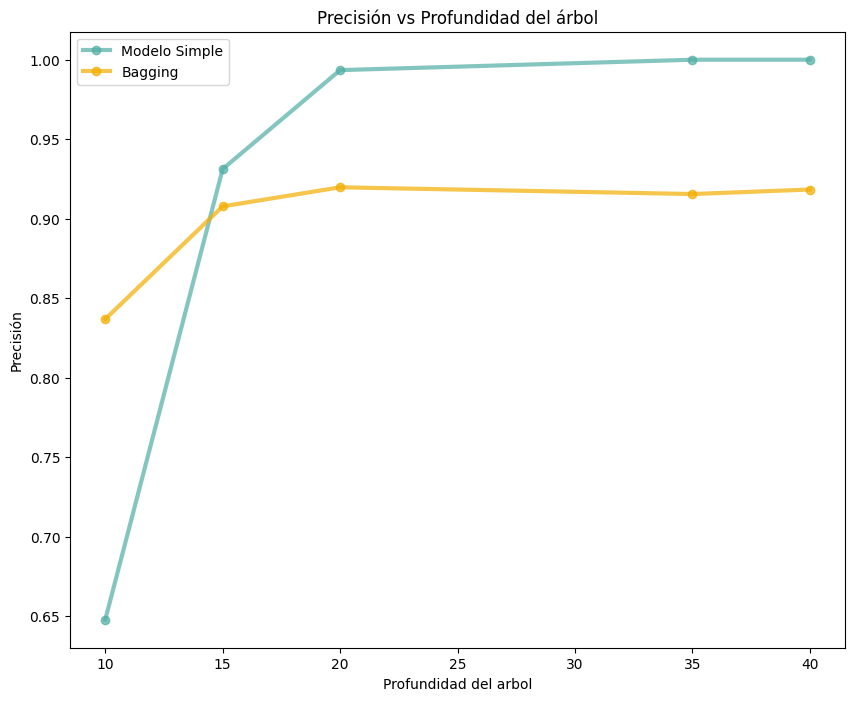

In [14]:
#Graficar precisión vs. profundidad del árbol: Muestra cómo varía la precisión con la profundidad del árbol.
plt.figure(figsize=(10,8))
plt.plot(depths, train_results_simple, "o-", alpha=0.7, linewidth=3, color='#50AEA4', label='Modelo Simple')
plt.plot(depths, train_results_bagging, "o-", alpha=0.7, linewidth=3, color='#F2AD00', label='Bagging')
plt.title('Precisión vs Profundidad del árbol')
plt.ylabel('Precisión')
plt.xlabel('Profundidad del arbol')
plt.legend(loc='best')
plt.show()

In [ ]:
#Predicciones y observaciones: Con el modelo optimizado, realiza una predicción y anota tus observaciones.

#tabla de precision
table = PrettyTable()
table.field_names = ['Profundidad', 'Precisión (%)']
for pd, acc in zip(depths, train_results_bagging):
    table.add_row([pd, round(acc*100, 2)])
print(table)

+-------------+---------------+
| Profundidad | Precisión (%) |
+-------------+---------------+
|      10     |     83.68     |
|      15     |     90.77     |
|      20     |     91.97     |
|      35     |     91.55     |
|      40     |     91.83     |
+-------------+---------------+


Las observaciones son las siguientes.

Con el modelo Bagging la mejor precision para las predicciones es del 91.97% con una profundidad de 20.

# Modelo de Random Forest con GridSearchCV

In [16]:
#Implementar un modelo de Random Forest: Utiliza RandomForestClassifier de sklearn para crear un modelo de clasificación basado en Random Forest.

#crear el modelo de random forest classifier para diferentes profundidades
train_results_rf = []
for depth in depths:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=2024)
    
    #ajustar el modelo en los datos de entrenamiento
    clf_rf.fit(X_train, y_train)
    
    #hacer predicciones en los datos de validacion
    y_pred_rf = clf_rf.predict(X_test)
    
    #calcular la precision de las predicciones
    acc_rf = accuracy_score(y_test, y_pred_rf)
    train_results_rf.append(acc_rf)

In [17]:
#Tabla para visualizar la precisión de cada profundidad
table = PrettyTable()
table.field_names = ['Profundidad', 'Precisión (%)']
for pd, acc in zip(depths, train_results_rf):
    table.add_row([pd, round(acc*100, 2)])
print(table)

+-------------+---------------+
| Profundidad | Precisión (%) |
+-------------+---------------+
|      10     |     95.65     |
|      15     |     97.38     |
|      20     |     97.58     |
|      35     |     97.49     |
|      40     |     97.49     |
+-------------+---------------+


In [18]:
best_params_rf = np.argmax(train_results_rf)
print(f"Mejor profundidad es: {depths[best_params_rf]} con una precisión de {train_results_rf[best_params_rf]*100:.2f}%")

Mejor profundidad es: 20 con una precisión de 97.58%


In [ ]:
#Optimización de hiperparámetros con GridSearchCV: Utiliza GridSearchCV para encontrar la mejor combinación de hiperparámetros para el modelo.

#Definir los parámetros a optimizar: Especifica los rangos de los parámetros como n_estimators, max_depth, y min_samples_split.
param_grid = {
    # Elegir 4 valores de arboles en el bosque
    'n_estimators': depths,
    # Elegir 4 a 5 valores de profundidad maxima en cada arbol 
    'max_depth': [ 10, 15, 20, 35, 40],
    # Elegir 3 valores que indican un criterio de parada como el minimo numero de muestras requeridas para dividir un nodo
    'min_samples_split': [3, 5, 10],
    # Elegir 3 valores que indican un criterio de parada como el minimo numero de muestras que deben estar presentes en un nodo hoja.
    'min_samples_leaf': [4, 6, 8],
    # Elegir criterios disponibles de características a considerar al buscar la mejor división.
    'max_features': ['sqrt', 'log2'],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Realizar la búsqueda de la mejor combinación de parámetros

# ajustar los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
Mejores parámetros encontrados:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 40}


In [31]:
#Obtener el mejor modelo: Utiliza el mejor estimador encontrado por GridSearchCV para hacer predicciones y evaluar la precisión.
best_rf = grid_search.best_estimator_

#realizar predicciones en los datos de validacion
y_pred_best = best_rf.predict(X_test)

#calcular la precision de las predicciones
acc_best = accuracy_score(y_test, y_pred_best)
print(f'Precisión del mejor modelo Random Forest con GridSearchCV es: {100*acc_best:.2f}%')

Precisión del mejor modelo Random Forest con GridSearchCV es: 96.67%


In [43]:
#Entrenar y validar el modelo: Utiliza cross-validation para entrenar y validar el modelo con diferentes combinaciones de parámetros.

#Modelo de validacion cruzada
from sklearn.model_selection import cross_val_score

#Validacion cruzada con el mejor modelo
scores = cross_val_score(best_rf, X_train, y_train, cv=6, scoring='accuracy')

#Mostrar los resultados de la validacion cruzada
print(f'Precisión de la validación cruzada: {100*scores.mean():.2f}%')

Precisión de la validación cruzada: 96.24%


In [33]:
#Seleccionar el mejor modelo: Identifica y guarda el modelo con la mejor precisión.
final_model = train_results_rf
print(f'El mejor modelo seleccionado es Random Forest ya que tienen la mejor precisión respecto a los demas con {train_results_rf[best_params_rf]*100:.2f}%')

El mejor modelo seleccionado es Random Forest ya que tienen la mejor precisión respecto a los demas con 97.58%


<class 'dict'>


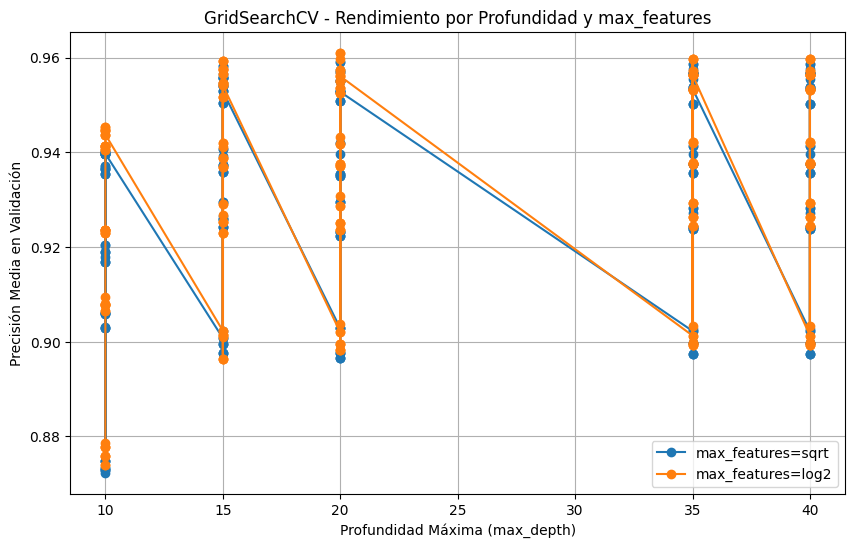

In [39]:
#Graficar los resultados de GridSearchCV: 
#Muestra los resultados del proceso de optimización para visualizar el rendimiento de las diferentes configuraciones.
print(type(grid_search.cv_results_))
result = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
for max_feat in result['param_max_features'].unique():
    subset = result[result['param_max_features'] == max_feat]
    plt.plot(subset['param_max_depth'], subset['mean_test_score'], marker='o', label=f"max_features={max_feat}")

plt.xlabel('Profundidad Máxima (max_depth)')
plt.ylabel('Precisión Media en Validación')
plt.title('GridSearchCV - Rendimiento por Profundidad y max_features')
plt.legend(loc='best')
plt.grid()
plt.show()

# Análisis y conclusiones

Con los 3 modelos realizados se puede observar lo siguiente:

En este análisis se evaluó la precisión de las predicciones utilizando tres modelos de aprendizaje automático: Árboles de Decisión, Bagging y Random Forest. Para optimizar los resultados, se varió la profundidad de los modelos con el objetivo de identificar el punto óptimo de desempeño.

En el modelo de Árbol de Decisión, se determinó que una profundidad de 15 permite alcanzar una precisión del 65.19% en las predicciones.

Por otro lado, el modelo Bagging mostró su mejor rendimiento con una profundidad de 20, logrando una precisión del 91.97%. 

En el caso de Random Forest, la profundidad óptima también fue de 20, obteniendo una precisión del 97.58%.

Para optimizar los hiperparámetros, se utilizó GridSearchCV, obteniendo los siguientes valores óptimos para la predicción:

. max_depth: 20

. max_features: 'log2'

. min_samples_leaf: 4

. min_samples_split: 3

. n_estimators: 40

Al aplicar estos hiperparámetros, la precisión del modelo alcanzó el 96.67%. Además, con la validación cruzada se obtuvo una precisión de 96.24%, lo que confirma que el modelo no presenta sobreajuste, tiene un rendimiento estable y es poco probable que el modelo haya aprendido patrones específicos del conjunto de entrenamiento.

En conclusión, al comparar la precisión de los diferentes modelos, se determina que Random Forest es la mejor opción, ya que ofrece la mayor precisión en las predicciones en comparación con los demás enfoques evaluados.